<a href="https://colab.research.google.com/github/sanath2101/lerninggithub/blob/main/Naive_Bayes_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAIVE BAYES ENGLISH TEST CLASSIFICATION
We have 20 unique classes
We have 11314 training samples
We have 7532 test samples
['rec.autos' 'sci.crypt' 'alt.atheism' ... 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']


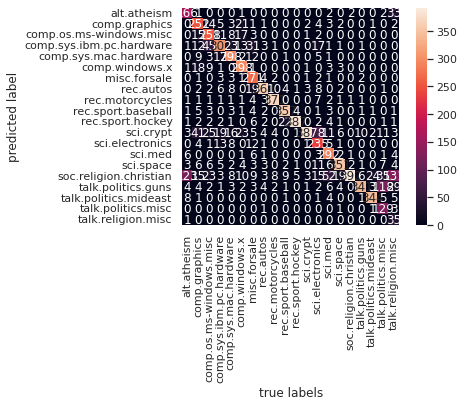

The accuracy is 0.7738980350504514


In [4]:
print("NAIVE BAYES ENGLISH TEST CLASSIFICATION")
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style
# Load the dataset
data = fetch_20newsgroups()# Get the text categories
text_categories = data.target_names# define the training set
train_data = fetch_20newsgroups(subset="train", categories=text_categories)# define the test set
test_data = fetch_20newsgroups(subset="test", categories=text_categories)
print("We have {} unique classes".format(len(text_categories)))
print("We have {} training samples".format(len(train_data.data)))
print("We have {} test samples".format(len(test_data.data)))
# let’s have a look as some training data let it 5th only
#print(test_data.data[5])
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())# Train the model using the training data
model.fit(train_data.data, train_data.target)# Predict the categories of the test data
predicted_categories = model.predict(test_data.data)
print(np.array(test_data.target_names)[predicted_categories])
# plot the confusion matrix
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T,  square  = True, annot=True, fmt = "d", xticklabels=train_data.target_names,yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(test_data.target, predicted_categories)))